In [1]:
# ==============
# !!! SET UP !!!
# ==============

from astropy.io import fits
import os
import numpy as np
import string
import re

pathin = '/home/ambra/Desktop/cluster-morgana/run0406_test/run0406/' 
path = pathin + 'run0406_ID000126/'
png = pathin + 'png/'
template = 'run0406_ID000126_ebl.fits'

hdul =  fits.open(pathin + template)
hdul.info()

# energybins [GeV]
energy=np.array(hdul[1].data)
# timebins [s]
time=np.array(hdul[2].data)
# spectra [fotoni/GeV/cm^2/s]
spectra=np.array(hdul[3].data)
# ebl [fotoni/GeV/cm^2/s]
ebl=np.array(hdul[4].data)

Nt=len(time)
Ne=len(energy)
print('energy', Ne, 'time', Nt)

print('done')

Filename: /home/ambra/Desktop/cluster-morgana/run0406_test/run0406/run0406_ID000126_ebl.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  ENERGIES      1 BinTableHDU     13   41R x 1C   [E]   
  2  TIMES         1 BinTableHDU     13   71R x 1C   [E]   
  3  SPECTRA       1 BinTableHDU     92   71R x 41C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  4  EBL GILMORE    1 BinTableHDU     92   71R x 41C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
energy 41 time 71
done


(1.0, 28.37082004547119)


/home/ambra/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


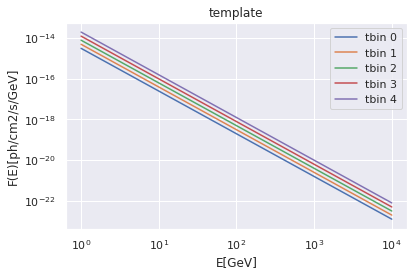

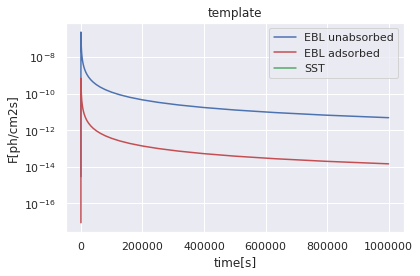

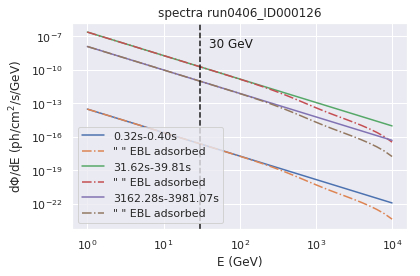

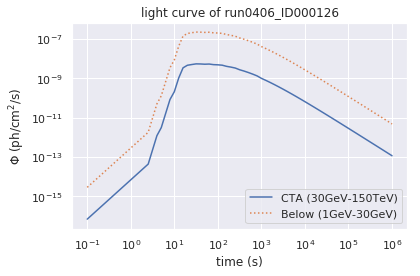

In [71]:
# =====================
# !!! PLOT TEMPLATE !!!
# =====================

import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np
import seaborn as sns


sns.set()

# TIME GRID ---!
t=[0.0 for x in range(Nt+1)]
for i in range(Nt-1):
    t[i+1]=time[i][0]+(time[i+1][0]-time[i][0])/2
# last bin
t[Nt]=time[Nt-1][0]+(time[Nt-1][0]-t[Nt-1])


# ENERGY GRID ---!
en=[1.0 for x in range(Ne+1)]
for i in range(Ne-1):
    en[i+1]=energy[i][0]+(energy[i+1][0]-energy[i][0])/2
# last bin
en[Ne]=energy[Ne-1][0]+(energy[Ne-1][0]-en[Ne-1])

LST = (min(en, key=lambda x:abs(x-30)), min(en, key=lambda x:abs(x-150)))
MST = (min(en, key=lambda x:abs(x-150)), min(en, key=lambda x:abs(x-10000)))
SST = (min(en, key=lambda x:abs(x-1000)), min(en, key=lambda x:abs(x-300000)))
CTA = (min(en, key=lambda x:abs(x-30)), min(en, key=lambda x:abs(x-150000)))

elow = (min(en, key=lambda x:abs(x-1)), min(en, key=lambda x:abs(x-30)))
print(elow)

# FLUX SPECTRA ---!
f=[]
for i in range(Nt):
    f.append(0.0)
    for j in range(Ne):
        f[i]=f[i]+spectra[i][j]*(en[j+1]-en[j])
        
# FLUX EBL ---!
f2=[]
f3=[]
f4=[]
f5=[]
f6=[]
f7=[]
for i in range(Nt):
    f2.append(0.0)
    f3.append(0.0)
    f4.append(0.0)
    f5.append(0.0)
    f6.append(0.0)
    f7.append(0.0)
    for j in range(Ne):
        f2[i]=f2[i]+ebl[i][j]*(en[j+1]-en[j])
        if en[j] <= LST[1] and en[j] >= LST[0]:
            f3[i]=f3[i]+ebl[i][j]*(en[j+1]-en[j])
        if en[j] <= MST[1] and en[j] >= MST[0]:
            f4[i]=f4[i]+ebl[i][j]*(en[j+1]-en[j])
        if en[j] <= CTA[1] and en[j] >= CTA[0]:
            f5[i]=f5[i]+ebl[i][j]*(en[j+1]-en[j])
        if en[j] < LST[0]:
            f6[i]=f6[i]+ebl[i][j]*(en[j+1]-en[j])
        if en[j] <= SST[1] and en[j] >= SST[0]:
            f5[i]=f5[i]+ebl[i][j]*(en[j+1]-en[j])
            
# first 10 bins spectra ---!
fig1=plt.figure(1)
for i in range(5):
    x=[]
    y=[]
    for j in range(Ne):
        x.append(energy[j][0])
        y.append(spectra[i][j])
    plt.loglog(x,y, label='tbin %d' %i)
    plt.title('template')
    plt.xlabel('E[GeV]')
    plt.ylabel('F(E)[ph/cm2/s/GeV]')
    plt.legend()
plt.tight_layout()
fig1.savefig(png + 'template_spectra.png')
fig1.show()


# lightcurve ---!
fig2=plt.figure(2)
ax = plt.subplot(111, yscale='log')
plt.plot(time,f, label='EBL unabsorbed')
plt.plot(time,f4, c='r', label='EBL adsorbed')
plt.plot(time,f7, c='g', label='SST')
plt.title('template')
plt.xlabel('time[s]')
plt.ylabel('F[ph/cm2s]')
plt.legend()
plt.tight_layout()
fig2.savefig(png + 'template_lightcurve.png')
plt.show()

# first 10 bins ebl ---!
fig3=plt.figure(3)
for i in range(3):
    x=[]
    y=[]
    z=[]
    for j in range(Ne):
        x.append(energy[j][0])
        y.append(spectra[i*20+5][j])
        z.append(ebl[i*20+5][j])
    plt.loglog(x,y, '-', label='%0.2fs-%0.2fs' %(time[i*20+5][0], time[i*20+6][0]))
    plt.loglog(x,z, '-.', label='" " EBL adsorbed') #%(time[i*20+5][0], time[i*20+6][0]))
    plt.title('spectra run0406_ID000126')
    plt.xlabel('E (GeV)')
    plt.ylabel('d$\Phi$/dE (ph/cm$^2$/s/GeV)')
plt.axvline(30, c='k', ls='--')
plt.text(40, 1e-8, '30 GeV', color='k')
plt.legend(loc=3) #if i == 0 else None
#plt.xlim([0.1, 1e4])
plt.tight_layout()
fig3.savefig(png + 'template_spectra_ebl.png')
plt.show()

# lightcurve ebl ---!
fig4=plt.figure(4)
b=71
#plt.loglog(time[:b],f2[:b], label='E>1GeV')
#plt.loglog(time[:b],f3[:b], label='LST (30GeV-150GeV)')
#plt.loglog(time[:b],f4[:b], label='MST (150GeV-10TeV)')
plt.loglog(time[:b],f5[:b], label='CTA (30GeV-150TeV)')
plt.loglog(time[:b],f6[:b], ':', label='Below (1GeV-30GeV)')
plt.title('light curve of run0406_ID000126')
plt.xlabel('time (s)')
plt.ylabel('$\Phi$ (ph/cm$^2$/s)')
plt.yscale('log')
plt.legend()
plt.tight_layout()
fig4.savefig(png + 'template_lightcurve_ebl.png')
plt.show()
